In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.feature_selection import SelectKBest

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn import metrics
import itertools

# Sequential Pattern Mining

In [2]:
# !pip install prefixspan

In [3]:
from prefixspan import PrefixSpan

In [4]:
directory = 'C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/train/Inertial Signals/'

In [5]:
df = pd.read_csv(directory+'body_acc_x_train.txt', delim_whitespace=True, header=None).values #load data

In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [7]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df)
norm_df = norm_df.squeeze()
df = pd.DataFrame(norm_df)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.709901,2.675890,2.382460,0.951098,2.904276,0.604010,0.846195,1.341353,0.352956,1.803196,...,-0.291233,-1.284527,-0.750909,-0.623342,-1.049709,-0.693987,-0.873362,-1.161558,-0.846967,-0.235697
1,0.464438,2.209248,1.365748,1.046832,1.580552,1.131873,0.729369,0.407696,-0.083221,-0.270836,...,-0.140117,-0.159085,0.585142,0.690147,0.456042,-0.459017,-1.989214,-2.433157,-1.572540,-0.894783
2,1.066986,0.638496,-0.291520,-1.432367,-2.453015,-1.229748,0.104680,0.082536,0.596238,-0.472442,...,0.080000,0.489776,-0.239201,-0.282774,-0.243294,-0.255975,-0.097741,0.281227,0.924472,0.601566
3,-0.784818,-0.612708,0.021781,0.029409,-0.255732,0.249745,0.291255,-1.299021,-3.439735,-4.037477,...,0.048204,0.662268,0.384262,0.183079,-0.202018,-0.837987,-0.732209,-0.446782,-0.560578,-0.133412
4,0.140235,-0.038086,0.603969,1.647878,1.229941,0.536011,1.055758,1.223177,1.211866,1.176099,...,1.351554,1.842294,-0.026261,-1.272882,0.222071,1.958674,0.903667,-0.249263,-0.510118,-1.554606


In [28]:
# SAX transform
n_paa_segments = 20
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(df)
sax_ts_inv = sax.inverse_transform(ts_sax)

C:\Users\Admin\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 7352 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [29]:
len(ts_sax[0])

20

In [30]:
new_ts_sax = ts_sax.transpose(2,0,1).reshape(20,-1)
new_ts_sax 

array([[9, 8, 9, ..., 4, 6, 4],
       [6, 6, 7, ..., 5, 1, 5],
       [0, 9, 2, ..., 9, 3, 2],
       ...,
       [7, 6, 4, ..., 8, 9, 3],
       [2, 1, 8, ..., 3, 8, 2],
       [4, 5, 3, ..., 5, 6, 9]])

In [31]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield tuple(l[i:i+n])

In [32]:
# chuck a list into a list of tuples 

seq_lst = []
for id in range(len(new_ts_sax )):
    single_sequence = []
    
    for seq in (chunks(new_ts_sax [id], 5)):      #3 events per transaction
        single_sequence.append(seq)        
    seq_lst.append(single_sequence)  

In [36]:
print(seq_lst[0])

[(9, 8, 9, 9, 8), (7, 7, 3, 4, 6), (2, 4, 1, 1, 2), (3, 2, 2, 1, 2), (9, 5, 3, 3, 7), (3, 6, 4, 4, 4), (6, 1, 1, 6, 4), (5, 4, 7, 5, 6), (2, 2, 4, 5, 4), (3, 6, 4, 6, 5), (1, 4, 2, 2, 8), (7, 5, 6, 8, 5), (4, 0, 4, 8, 8), (5, 8, 6, 6, 4), (6, 7, 6, 5, 5), (3, 1, 2, 3, 3), (7, 8, 6, 5, 5), (2, 1, 4, 2, 6), (3, 5, 3, 8, 0), (5, 8, 3, 3, 7), (5, 3, 7, 0, 4), (7, 5, 3, 3, 7), (2, 6, 9, 3, 2), (3, 6, 6, 7, 4), (2, 9, 4, 2, 3), (5, 5, 5, 6, 0), (6, 5, 3, 7, 2), (7, 2, 5, 3, 3), (8, 3, 7, 3, 6), (7, 4, 5, 1, 8), (9, 6, 5, 6, 1), (2, 5, 3, 3, 1), (8, 6, 6, 2, 2), (3, 4, 2, 1, 1), (2, 3, 6, 5, 6), (7, 4, 6, 2, 7), (2, 4, 4, 6, 4), (4, 4, 3, 6, 5), (8, 5, 3, 4, 9), (4, 3, 5, 2, 5), (6, 8, 2, 9, 7), (2, 8, 2, 7, 3), (3, 6, 2, 3, 3), (5, 3, 4, 3, 4), (5, 6, 0, 3, 4), (5, 5, 1, 4, 3), (3, 7, 8, 9, 8), (7, 6, 7, 2, 1), (4, 7, 9, 7, 8), (6, 6, 2, 1, 1), (1, 6, 4, 3, 3), (3, 7, 5, 2, 4), (6, 6, 2, 5, 4), (6, 7, 3, 3, 4), (7, 6, 5, 3, 7), (6, 1, 4, 7, 0), (9, 7, 9, 8, 9), (7, 8, 5, 4, 2), (4, 3, 4, 1, 

In [37]:
ps = PrefixSpan(seq_lst)

In [39]:
ps.topk(10)

[(15, [(1, 1, 1, 1, 1)]),
 (14, [(2, 2, 2, 2, 2)]),
 (13, [(7, 7, 7, 7, 7)]),
 (12, [(2, 1, 1, 1, 1)]),
 (11, [(1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]),
 (11, [(5, 5, 5, 5, 5)]),
 (10, [(1, 1, 1, 1, 1), (2, 1, 1, 1, 1)]),
 (10, [(2, 2, 1, 1, 1)]),
 (10, [(2, 2, 2, 2, 2), (1, 1, 1, 1, 1)]),
 (10, [(7, 7, 7, 7, 7), (1, 1, 1, 1, 1)])]

In [42]:
ps.frequent(len(seq_lst) * 0.70) 

[(14, [(2, 2, 2, 2, 2)]), (15, [(1, 1, 1, 1, 1)])]

In [43]:
#!pip install spmf

# Advanced Clustering

In [46]:
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from fma_metadata import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [134]:
train = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


## XMeans

In [97]:
#!pip install pyclustering

     ---------------------------------------- 2.6/2.6 MB 856.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=46d2836eb34500ab2c9c80d42fa5fe6ea7f2e8dc5b9a54b975ef423ea53a55e0
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\dc\25\8b\072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [98]:
from pyclustering.cluster import xmeans

In [135]:
train = train.drop("ActivityName", axis=1)

In [136]:
scaler = StandardScaler()
X = scaler.fit_transform(train)

In [138]:
from pyclustering.cluster import xmeans
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer_multidim

In [140]:
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()

In [141]:
xmeans_instance = xmeans.xmeans(X, initial_centers)
xmeans_instance.process()

In [142]:
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

In [145]:
def gshow():
    for indexes in clusters:
        plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)
    for c in centers:
        plt.scatter(c[i], c[j], s=100, edgecolors='k')

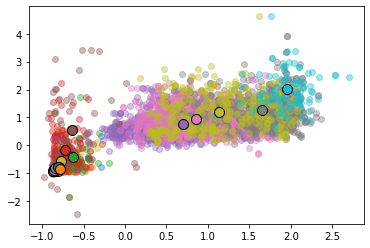

In [155]:
i = train.columns.values.tolist().index('tBodyAcc-max()-X')
j = train.columns.values.tolist().index('tBodyAcc-max()-Y')
gshow()

## OPTICS

In [224]:
from sklearn.cluster import OPTICS
from tqdm.notebook import tqdm_notebook
import time
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [225]:
scaler = MinMaxScaler() 
X = scaler.fit_transform(train)

In [226]:
X

array([[0.64429225, 0.48985291, 0.43354743, ..., 0.47068654, 0.        ,
        0.8       ],
       [0.63920942, 0.49179472, 0.4382399 , ..., 0.47284164, 0.        ,
        0.8       ],
       [0.63982653, 0.49026642, 0.44326915, ..., 0.47544109, 0.        ,
        0.8       ],
       ...,
       [0.63669369, 0.49149469, 0.47748909, ..., 0.52040559, 1.        ,
        0.2       ],
       [0.64482708, 0.49057848, 0.42085971, ..., 0.51266974, 1.        ,
        0.2       ],
       [0.67575173, 0.49378844, 0.39806642, ..., 0.51834742, 1.        ,
        0.2       ]])

In [227]:
sil = []
for i in tqdm(range(3, 16)):
    # Building the OPTICS Clustering model
    optics_model = OPTICS(min_samples=i, metric='euclidean')            # GOOD Results: min_samples: 12
    # Training the model
    optics_model.fit(X)
    sil.append(silhouette_score(X, optics_model.labels_))

100%|██████████| 13/13 [1:43:14<00:00, 476.49s/it]


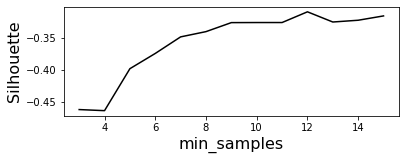

In [228]:
fig, ax1 = plt.subplots(figsize=(6,2))
t = np.arange(3,16,1)
color='tab:blue'

color = 'black'
ax1.set_ylabel('Silhouette', color=color, fontsize=16)
ax1.set_xlabel('min_samples', fontsize=16)
ax1.plot(t, sil, color=color)
ax1.tick_params(axis='y', labelcolor=color)

In [234]:
# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples=12, metric='manhattan')            # GOOD Results: min_samples: 12
  
# Training the model
optics_model.fit(X)

OPTICS(metric='manhattan', min_samples=12)

In [235]:
optics_model.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [249]:
X[optics_model.labels_ != -1], optics_model.labels_[optics_model.labels_ != -1]

(array([[0.64101078, 0.48115189, 0.43255135, ..., 0.52204937, 0.        ,
         0.        ],
        [0.62792037, 0.46772499, 0.45240683, ..., 0.5223188 , 0.        ,
         0.        ],
        [0.62743361, 0.50190736, 0.43817096, ..., 0.51970841, 0.        ,
         0.        ],
        ...,
        [0.58284773, 0.49273324, 0.44017056, ..., 0.48579684, 0.96551724,
         0.        ],
        [0.60520843, 0.5009925 , 0.42795363, ..., 0.48429972, 0.96551724,
         0.        ],
        [0.63134158, 0.49922863, 0.45257172, ..., 0.48709946, 0.96551724,
         0.        ]]),
 array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  

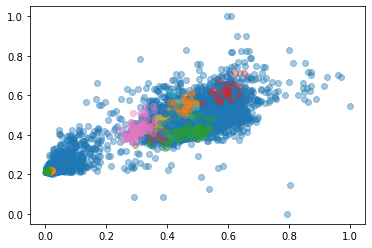

In [241]:
for cluster_id in np.unique(optics_model.labels_)[:20]:
    indexes = np.where(optics_model.labels_==cluster_id)
    plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)

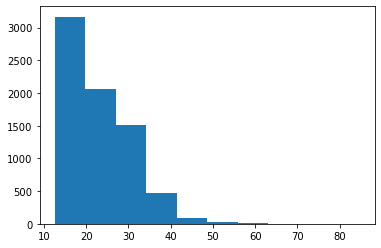

In [244]:
plt.hist(optics_model.reachability_[1:])
plt.show()

In [251]:
np.unique(optics_model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [253]:
np.unique(optics_model.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([6781,   23,   19,   29,   17,   50,  100,   26,   59,   53,   94,
          23,   55,   23], dtype=int64))

In [242]:
silhouette_score(X[optics_model.labels_ != -1], optics_model.labels_[optics_model.labels_ != -1])

0.24767230366579865